MAlARIA INCIDENCE IN COLOMBIA (1998)

In [57]:
# Import the pandas and numpy packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Load the data
colmunic = pd.read_csv('data/colmunic.csv')
coldept  = pd.read_csv('data/coldept.csv')

# Display the first few rows of each DataFrame to understand their structure
print("Department Data (first 5 rows):")
print(coldept.head())

print("\nMunicipal Data (first 5 rows):")
print(colmunic.head())

# Checking for missing values in both datasets
missing_values_dept = coldept.isnull().sum()
missing_values_munic = colmunic.isnull().sum()

# Print the number of missing values for each column
print("\nMissing Values in Department Data:")
print(missing_values_dept)

print("\nMissing Values in Municipal Data:")
print(missing_values_munic)

# Checking for consistency in department codes
consistent_dept_codes = coldept['CODDEPT'].isin(colmunic['CODDEPT']).all()

# Display the result of consistency check
print("\nAre all department codes in `coldept.csv` present in `colmunic.csv`?")
print(consistent_dept_codes)

# Optional: Additional data cleaning (e.g., removing duplicates)
# Removing duplicates if any
df_dept_clean = coldept.drop_duplicates()
df_munic_clean = colmunic.drop_duplicates()

# Verify the shape of the dataframes after cleaning
print("\nShape of Department Data after removing duplicates:", df_dept_clean.shape)
print("Shape of Municipal Data after removing duplicates:", df_munic_clean.shape)

# Checking for any anomalies in population data (e.g., negative values)
# Ensure no negative values in population columns
population_columns_dept = coldept.columns[coldept.columns.str.startswith('TP') | coldept.columns.str.startswith('UP') | coldept.columns.str.startswith('RP')]
population_columns_munic = colmunic.columns[colmunic.columns.str.startswith('TP') | colmunic.columns.str.startswith('UP') | colmunic.columns.str.startswith('RP')]

negative_values_dept = coldept[population_columns_dept].lt(0).sum()
negative_values_munic = colmunic[population_columns_munic].lt(0).sum()

print("\nNegative Values in Population Columns (Department Data):")
print(negative_values_dept)

print("\nNegative Values in Population Columns (Municipal Data):")
print(negative_values_munic)

# Display first few rows of cleaned data
from IPython.display import display

print("\nCleaned Department Data:")
display(df_dept_clean.head())

print("\nCleaned Municipal Data:")
display(df_munic_clean.head())

Department Data (first 5 rows):
        ADM1      ADM0  CODDEPT   TP1973  ...   RP2004   TP2005   UP2005   RP2005
0   Amazonas  COLOMBIA       91    15687  ...    47646    80487    31784    48703
1  Antioquia  COLOMBIA        5  3176695  ...  1501715  5750057  4246517  1503540
2     Arauca  COLOMBIA       81    46605  ...   124102   281435   154588   126847
3  Atlantico  COLOMBIA        8  1028934  ...   147792  2370753  2220795   149958
4     Bogota  COLOMBIA       11  2861913  ...    15817  7185889  7170008    15881

[5 rows x 46 columns]

Municipal Data (first 5 rows):
   ID      ADM0       ADM1        ADM2  ...  RP2004  TP2005  UP2005  RP2005
0   1  COLOMBIA    Guajira      URIBIA  ...   61405   69203    7430   61773
1   2  COLOMBIA    Guajira     MANAURE  ...   35133   46134    9669   36465
2   3  COLOMBIA    Guajira      MAICAO  ...   18028  148517  130149   18368
3   4  COLOMBIA    Guajira    RIOHACHA  ...    7501   99472   91906    7566
4   5  COLOMBIA  Magdalena  SITIONUEVO  .

,ADM1,ADM0,CODDEPT,TP1973,UP1973,RP1973,TP1985,UP1985,RP1985,TP1993,UP1993,RP1993,MALARI98,TP1995,UP1995,RP1995,TP1996,UP1996,RP1996,TP1997,UP1997,RP1997,TP1998,UP1998,RP1998,TP1999,UP1999,RP1999,TP2000,UP2000,RP2000,TP2001,UP2001,RP2001,TP2002,UP2002,RP2002,TP2003,UP2003,RP2003,TP2004,UP2004,RP2004,TP2005,UP2005,RP2005
0,Amazonas,COLOMBIA,91,15687,5849,2462,39937,20279,19658,56399,20544,35855,1536,60878,22444,38434,62823,23326,39497,64735,24206,40529,66638,25093,41545,68569,25999,42570,70489,26912,43577,72445,27848,44597,74403,28796,45607,76381,29762,46619,78403,30757,47646,80487,31784,48703
1,Antioquia,COLOMBIA,5,3176695,1996678,1180012,4067663,2687709,1379954,4919619,3439311,1480308,23946,4987824,3523284,1464540,5065232,3593197,1472035,5133439,3663997,1469442,5211843,3735512,1476331,5289860,3807439,1482421,5367221,3879632,1487589,5444134,3952117,1492017,5521056,4025269,1495787,5597894,4098731,1499163,5674169,4172454,1501715,5750057,4246517,1503540
2,Arauca,COLOMBIA,81,46605,18887,27718,89972,48729,41243,185882,94181,91701,1694,198720,101906,96814,207099,106959,100140,215410,112037,103373,223681,117154,106527,232013,122365,109648,240190,127554,112636,248440,132841,115599,256664,138174,118490,264888,143568,121320,273136,149034,124102,281435,154588,126847
3,Atlantico,COLOMBIA,8,1028934,954945,73989,1478213,1392480,85733,1837468,1712321,125147,55,1902878,1774795,128083,1946374,1816143,130231,1990465,1858082,132383,2035351,1900805,134546,2081038,1944315,136723,2127567,1988647,138920,2174929,2033795,141134,2223229,2079869,143360,2272170,2126584,145586,2321446,2173654,147792,2370753,2220795,149958
4,Bogota,COLOMBIA,11,2861913,2845361,16552,4236490,4227706,8784,5484244,5469105,15139,191,5678342,5663125,15217,5815511,5800216,15295,5956995,5941626,15369,6112196,6096732,15464,6276428,6260862,15566,6437842,6422198,15644,6573291,6557581,15710,6712247,6696473,15774,6865997,6850205,15792,7029928,7014111,15817,7185889,7170008,15881



Cleaned Municipal Data:


,ID,ADM0,ADM1,ADM2,CODDEPT,IDDANE,DANECODE,TP1973,UP1973,RP1973,TP1985,UP1985,RP1985,TP1993,UP1993,RP1993,MALARI98,TP1995,UP1995,RP1995,TP1996,UP1996,RP1996,TP1997,UP1997,RP1997,TP1998,UP1998,RP1998,TP1999,UP1999,RP1999,TP2000,UP2000,RP2000,TP2001,UP2001,RP2001,TP2002,UP2002,RP2002,TP2003,UP2003,RP2003,TP2004,UP2004,RP2004,TP2005,UP2005,RP2005
0,1,COLOMBIA,Guajira,URIBIA,44,44847,44847,57815,2881,54934,44076,4333,39743,61077,3379,57698,0,61708,3949,57759,62450,4267,58183,63197,4593,58604,63948,4924,59024,64699,5263,59436,65452,5608,59844,66204,5960,60244,66957,6318,60639,67709,6682,61027,68458,7053,61405,69203,7430,61773
1,2,COLOMBIA,Guajira,MANAURE,44,44560,44560,5661,4074,1587,6934,4922,2012,26735,4343,22392,0,29207,4974,24233,30692,5348,25344,32222,5741,26481,33798,6154,27644,35418,6589,28829,37086,7044,30042,38799,7522,31277,40561,8023,32538,42371,8548,33823,44229,9096,35133,46134,9669,36465
2,3,COLOMBIA,Guajira,MAICAO,44,44430,44430,36771,25161,11610,57337,49418,7919,104857,90291,14566,5,110056,95047,15009,113506,98171,15335,117045,101381,15664,120673,104676,15997,124385,108053,16332,128187,111519,16668,132075,115069,17006,136053,118708,17345,140121,122435,17686,144277,126249,18028,148517,130149,18368
3,4,COLOMBIA,Guajira,RIOHACHA,44,44001,44001,46024,22545,23479,85621,47030,38591,109474,85850,23624,488,109735,86397,23338,93609,86672,6937,94333,87321,7012,95043,87958,7085,95734,88577,7157,96410,89182,7228,97066,89767,7299,97703,90335,7368,98318,90883,7435,98909,91408,7501,99472,91906,7566
4,5,COLOMBIA,Magdalena,SITIONUEVO,47,47745,47745,16493,6289,10204,19961,8295,11666,20235,10677,9558,0,20251,10788,9463,20394,10916,9478,20545,11049,9496,20671,11170,9501,20782,11282,9500,20870,11383,9487,20948,11479,9469,21009,11566,9443,21058,11646,9412,21101,11723,9378,21143,11800,9343


In [58]:
# merge data files
merged_data = colmunic.merge(coldept, on= ['ADM0', 'ADM1', 'MALARI98'], how='left')

# Read the two shapefiles
colmunic_shapefile = gpd.read_file('data/colmunic.shp')
coldept_shapefile = gpd.read_file('data/coldept.shp')

# Merge the shapefiles
merged_shapefile = gpd.GeoDataFrame(pd.concat([colmunic_shapefile, coldept_shapefile], ignore_index=True))

# Save the merged shapefile
merged_shapefile.to_file("data/merged_shapefile.shp")

# Get the number of null values present in the data
merged_shapefile.isnull().sum()

# drop duplicates
merged_shapefile.drop_duplicates(inplace=True)

# Preview the dataframe
merged_shapefile.head(10)

,ID,ADM0,ADM1,ADM2,CODDEPT,IDDANE,DANECODE,TP1973,UP1973,RP1973,TP1985,UP1985,RP1985,TP1993,UP1993,RP1993,MALARI98,TP1995,UP1995,RP1995,TP1996,UP1996,RP1996,TP1997,UP1997,RP1997,TP1998,UP1998,RP1998,TP1999,UP1999,RP1999,TP2000,UP2000,RP2000,TP2001,UP2001,RP2001,TP2002,UP2002,RP2002,TP2003,UP2003,RP2003,TP2004,UP2004,RP2004,TP2005,UP2005,RP2005,geometry
0,1.0,COLOMBIA,Guajira,URIBIA,44,44847.0,44847,57815.0,2881.0,54934.0,44076.0,4333.0,39743.0,61077.0,3379.0,57698.0,0.0,61708.0,3949.0,57759.0,62450.0,4267.0,58183.0,63197.0,4593.0,58604.0,63948.0,4924.0,59024.0,64699.0,5263.0,59436.0,65452.0,5608.0,59844.0,66204.0,5960.0,60244.0,66957.0,6318.0,60639.0,67709.0,6682.0,61027.0,68458.0,7053.0,61405.0,69203.0,7430.0,61773.0,"POLYGON ((-71.32639 11.84789, -71.33579 11.855..."
1,2.0,COLOMBIA,Guajira,MANAURE,44,44560.0,44560,5661.0,4074.0,1587.0,6934.0,4922.0,2012.0,26735.0,4343.0,22392.0,0.0,29207.0,4974.0,24233.0,30692.0,5348.0,25344.0,32222.0,5741.0,26481.0,33798.0,6154.0,27644.0,35418.0,6589.0,28829.0,37086.0,7044.0,30042.0,38799.0,7522.0,31277.0,40561.0,8023.0,32538.0,42371.0,8548.0,33823.0,44229.0,9096.0,35133.0,46134.0,9669.0,36465.0,"POLYGON ((-72.42191 11.79824, -72.41980 11.795..."
2,3.0,COLOMBIA,Guajira,MAICAO,44,44430.0,44430,36771.0,25161.0,11610.0,57337.0,49418.0,7919.0,104857.0,90291.0,14566.0,5.0,110056.0,95047.0,15009.0,113506.0,98171.0,15335.0,117045.0,101381.0,15664.0,120673.0,104676.0,15997.0,124385.0,108053.0,16332.0,128187.0,111519.0,16668.0,132075.0,115069.0,17006.0,136053.0,118708.0,17345.0,140121.0,122435.0,17686.0,144277.0,126249.0,18028.0,148517.0,130149.0,18368.0,"POLYGON ((-72.18910 11.52420, -72.18330 11.532..."
3,4.0,COLOMBIA,Guajira,RIOHACHA,44,44001.0,44001,46024.0,22545.0,23479.0,85621.0,47030.0,38591.0,109474.0,85850.0,23624.0,488.0,109735.0,86397.0,23338.0,93609.0,86672.0,6937.0,94333.0,87321.0,7012.0,95043.0,87958.0,7085.0,95734.0,88577.0,7157.0,96410.0,89182.0,7228.0,97066.0,89767.0,7299.0,97703.0,90335.0,7368.0,98318.0,90883.0,7435.0,98909.0,91408.0,7501.0,99472.0,91906.0,7566.0,"POLYGON ((-72.63800 11.36790, -72.62590 11.349..."
4,5.0,COLOMBIA,Magdalena,SITIONUEVO,47,47745.0,47745,16493.0,6289.0,10204.0,19961.0,8295.0,11666.0,20235.0,10677.0,9558.0,0.0,20251.0,10788.0,9463.0,20394.0,10916.0,9478.0,20545.0,11049.0,9496.0,20671.0,11170.0,9501.0,20782.0,11282.0,9500.0,20870.0,11383.0,9487.0,20948.0,11479.0,9469.0,21009.0,11566.0,9443.0,21058.0,11646.0,9412.0,21101.0,11723.0,9378.0,21143.0,11800.0,9343.0,"POLYGON ((-74.77489 10.93158, -74.77530 10.933..."
5,6.0,COLOMBIA,Guajira,HATONUEVO,44,44378.0,44378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7295.0,5260.0,2035.0,7510.0,5429.0,2081.0,7729.0,5601.0,2128.0,7953.0,5778.0,2175.0,8182.0,5959.0,2223.0,8415.0,6144.0,2271.0,8653.0,6333.0,2320.0,8895.0,6527.0,2368.0,9143.0,6725.0,2418.0,9395.0,6928.0,2467.0,9651.0,7134.0,2517.0,"POLYGON ((-72.67190 11.10920, -72.65630 11.089..."
6,7.0,COLOMBIA,Magdalena,CIENAGA,47,47189.0,47189,121627.0,44409.0,77218.0,136403.0,57250.0,79153.0,158137.0,71395.0,86742.0,10.0,160692.0,73458.0,87234.0,163084.0,75012.0,88072.0,165569.0,76624.0,88945.0,167897.0,78176.0,89721.0,170133.0,79698.0,90435.0,172218.0,81162.0,91056.0,174256.0,82616.0,91640.0,176182.0,84027.0,92155.0,178043.0,85418.0,92625.0,179883.0,86810.0,93073.0,181747.0,88224.0,93523.0,"POLYGON ((-74.21581 11.09003, -74.20750 11.089..."
7,8.0,COLOMBIA,Atlantico,BARRANQUILLA (DIST.PORT.,08,8001.0,08001,703488.0,701945.0,1543.0,927233.0,923788.0,3445.0,1090618.0,1087406.0,3212.0,35.0,1126729.0,1123588.0,3141.0,1151096.0,1147978.0,3118.0,1175753.0,1172661.0,3092.0,1200818.0,1197754.0,3064.0,1226292.0,1223260.0,3032.0,1252195.0,1249197.0,2998.0,1278521.0,1275562.0,2959.0,1305334.0,1302415.0,2919.0,1332454.0,1329579.0,2875.0,1359700.0,1356873.0,2827.0,1386895.0,1384121.0,2774.0,"POLYGON ((-74.87283 11.06339, -74.87148 11.064..."
8,9.0,COLOMBIA,Atlantico,PUERTO COLOMBIA,08,8573.0,08573,14616.0,9814.0,4802.0,19243.0,12633.0,6610.0,29731.0,16926.0,12805.0,2.0,31529.0,18099.0,

In [59]:
# Create a Folium map centered around Colombia
colombia_map = folium.Map(location=[4.5709, -74.2973], zoom_start=6)

# Add malaria incidence data to the map
for _, row in merged_shapefile.iterrows():
    if row.geometry.geom_type == 'Point':
        location = [row.geometry.y, row.geometry.x]
    else:
        location = [row.geometry.centroid.y, row.geometry.centroid.x]
    
    folium.CircleMarker(
        location=location,  # Use geometry to get coordinates
        radius=5,
        popup=f"Municipality: {row['ADM2']}<br>Malaria Incidence: {row['MALARI98']}",
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(colombia_map)

# Save the map as an HTML file
colombia_map.save('data/malaria_incidence_map.html')

# Display the map
colombia_map

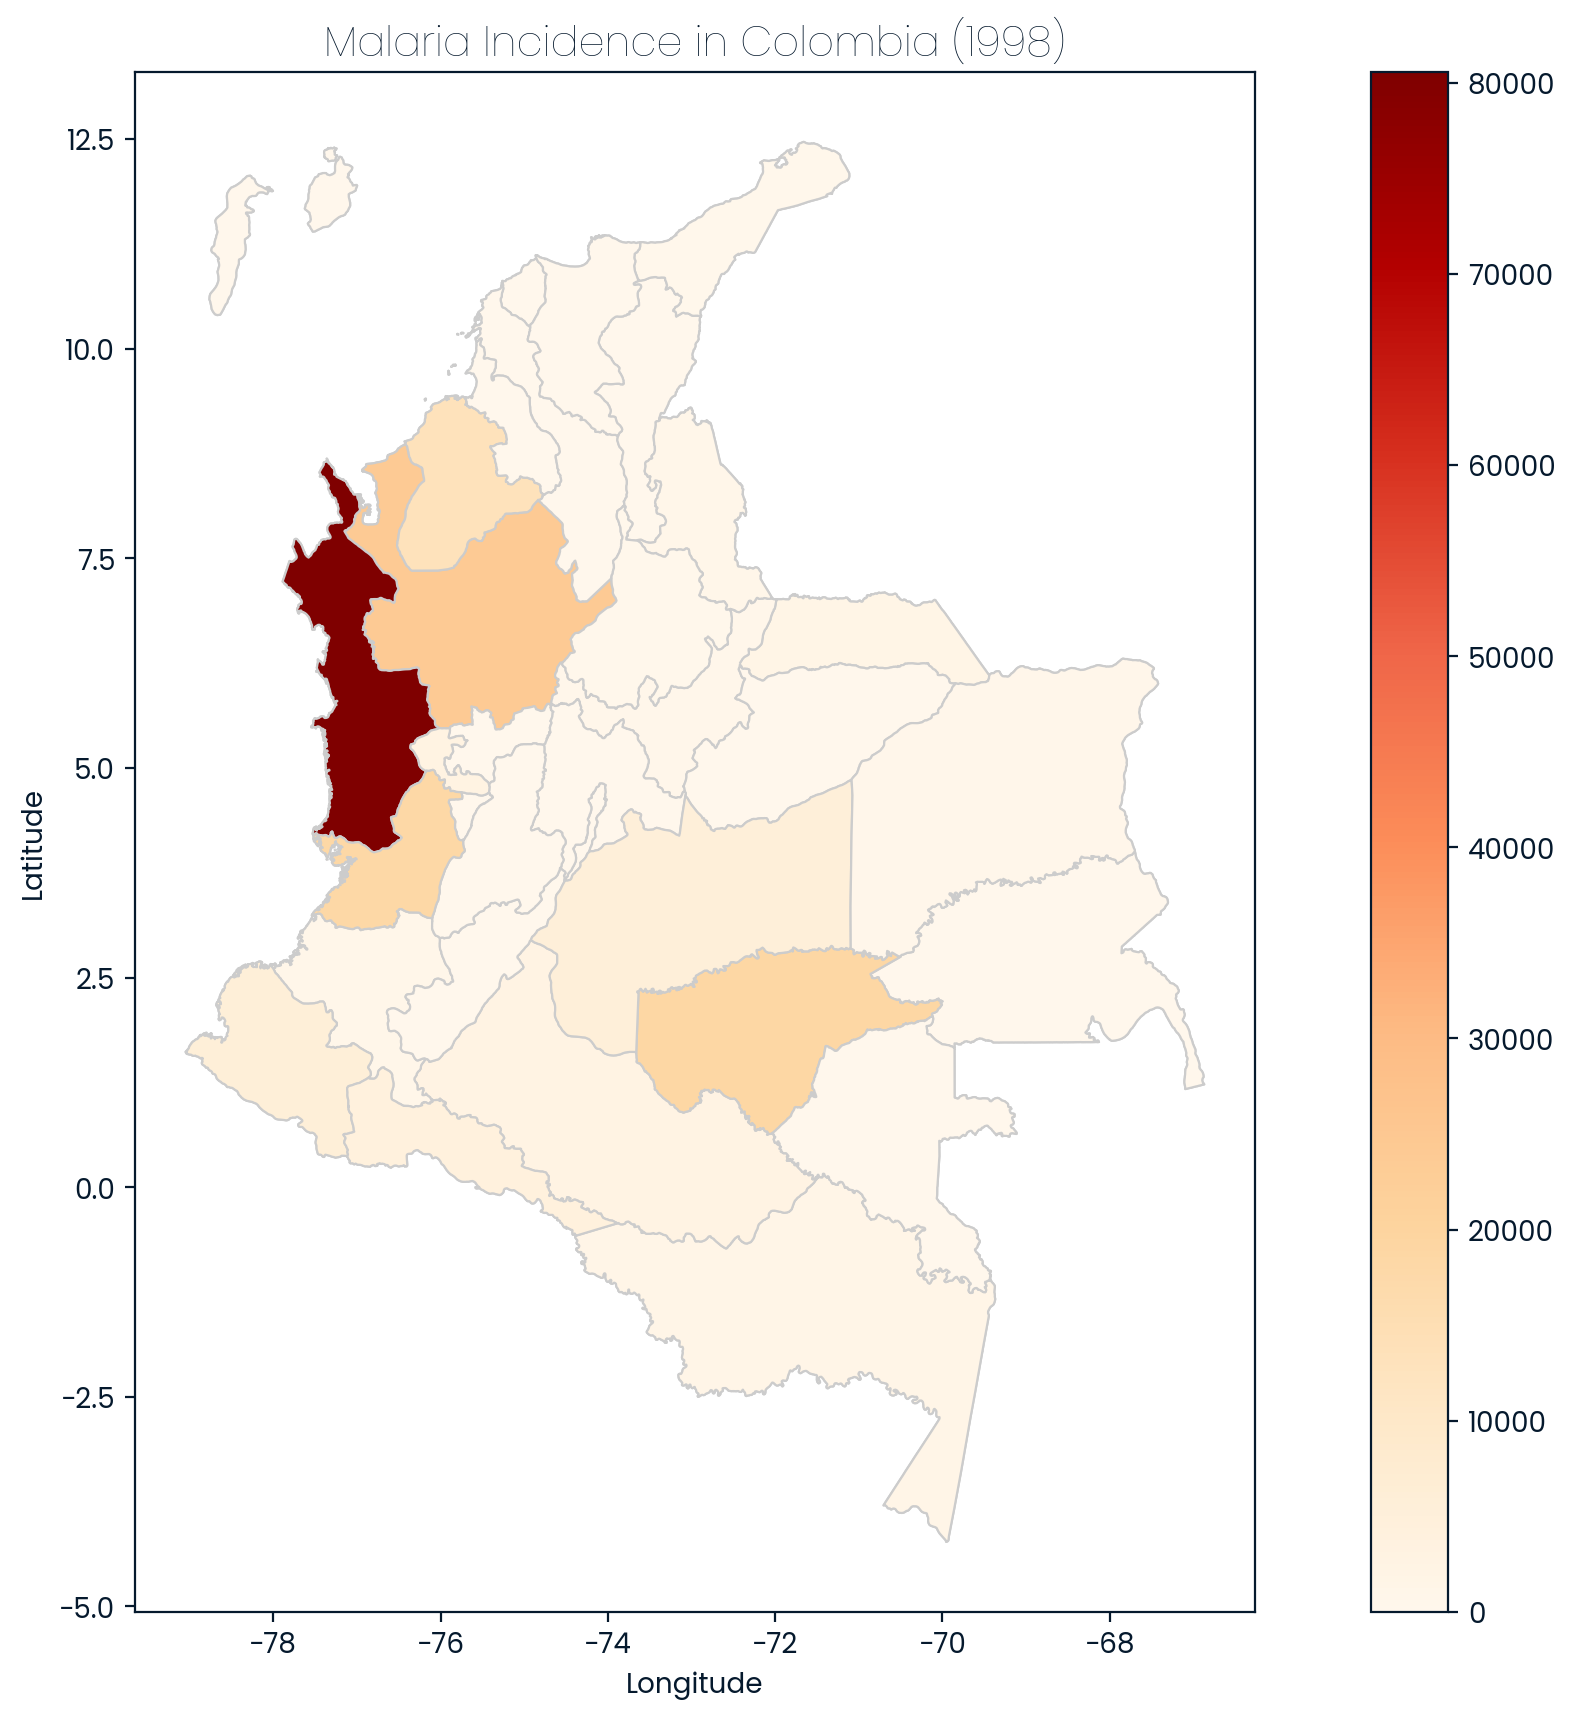

In [60]:
# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_shapefile.plot(column='MALARI98', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add titles and labels
ax.set_title('Malaria Incidence in Colombia (1998)', fontdict={'fontsize': '15', 'fontweight': '3'})
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Save the plot
plt.savefig('data/malaria_incidence_plot.png')

# Display the plot
plt.show()

In [61]:
# Select columns
dist_columns = ['ADM2', 'MALARI98', 'TP1998', 'UP1998', 'RP1998']
df_selected = merged_shapefile[dist_columns]

# Drop rows with missing values
df_selected = df_selected.dropna()

# Display the first few rows of the cleaned DataFrame
df_selected.head()

,ADM2,MALARI98,TP1998,UP1998,RP1998
0,URIBIA,0.0,63948.0,4924.0,59024.0
1,MANAURE,0.0,33798.0,6154.0,27644.0
2,MAICAO,5.0,120673.0,104676.0,15997.0
3,RIOHACHA,488.0,95043.0,87958.0,7085.0
4,SITIONUEVO,0.0,20671.0,11170.0,9501.0


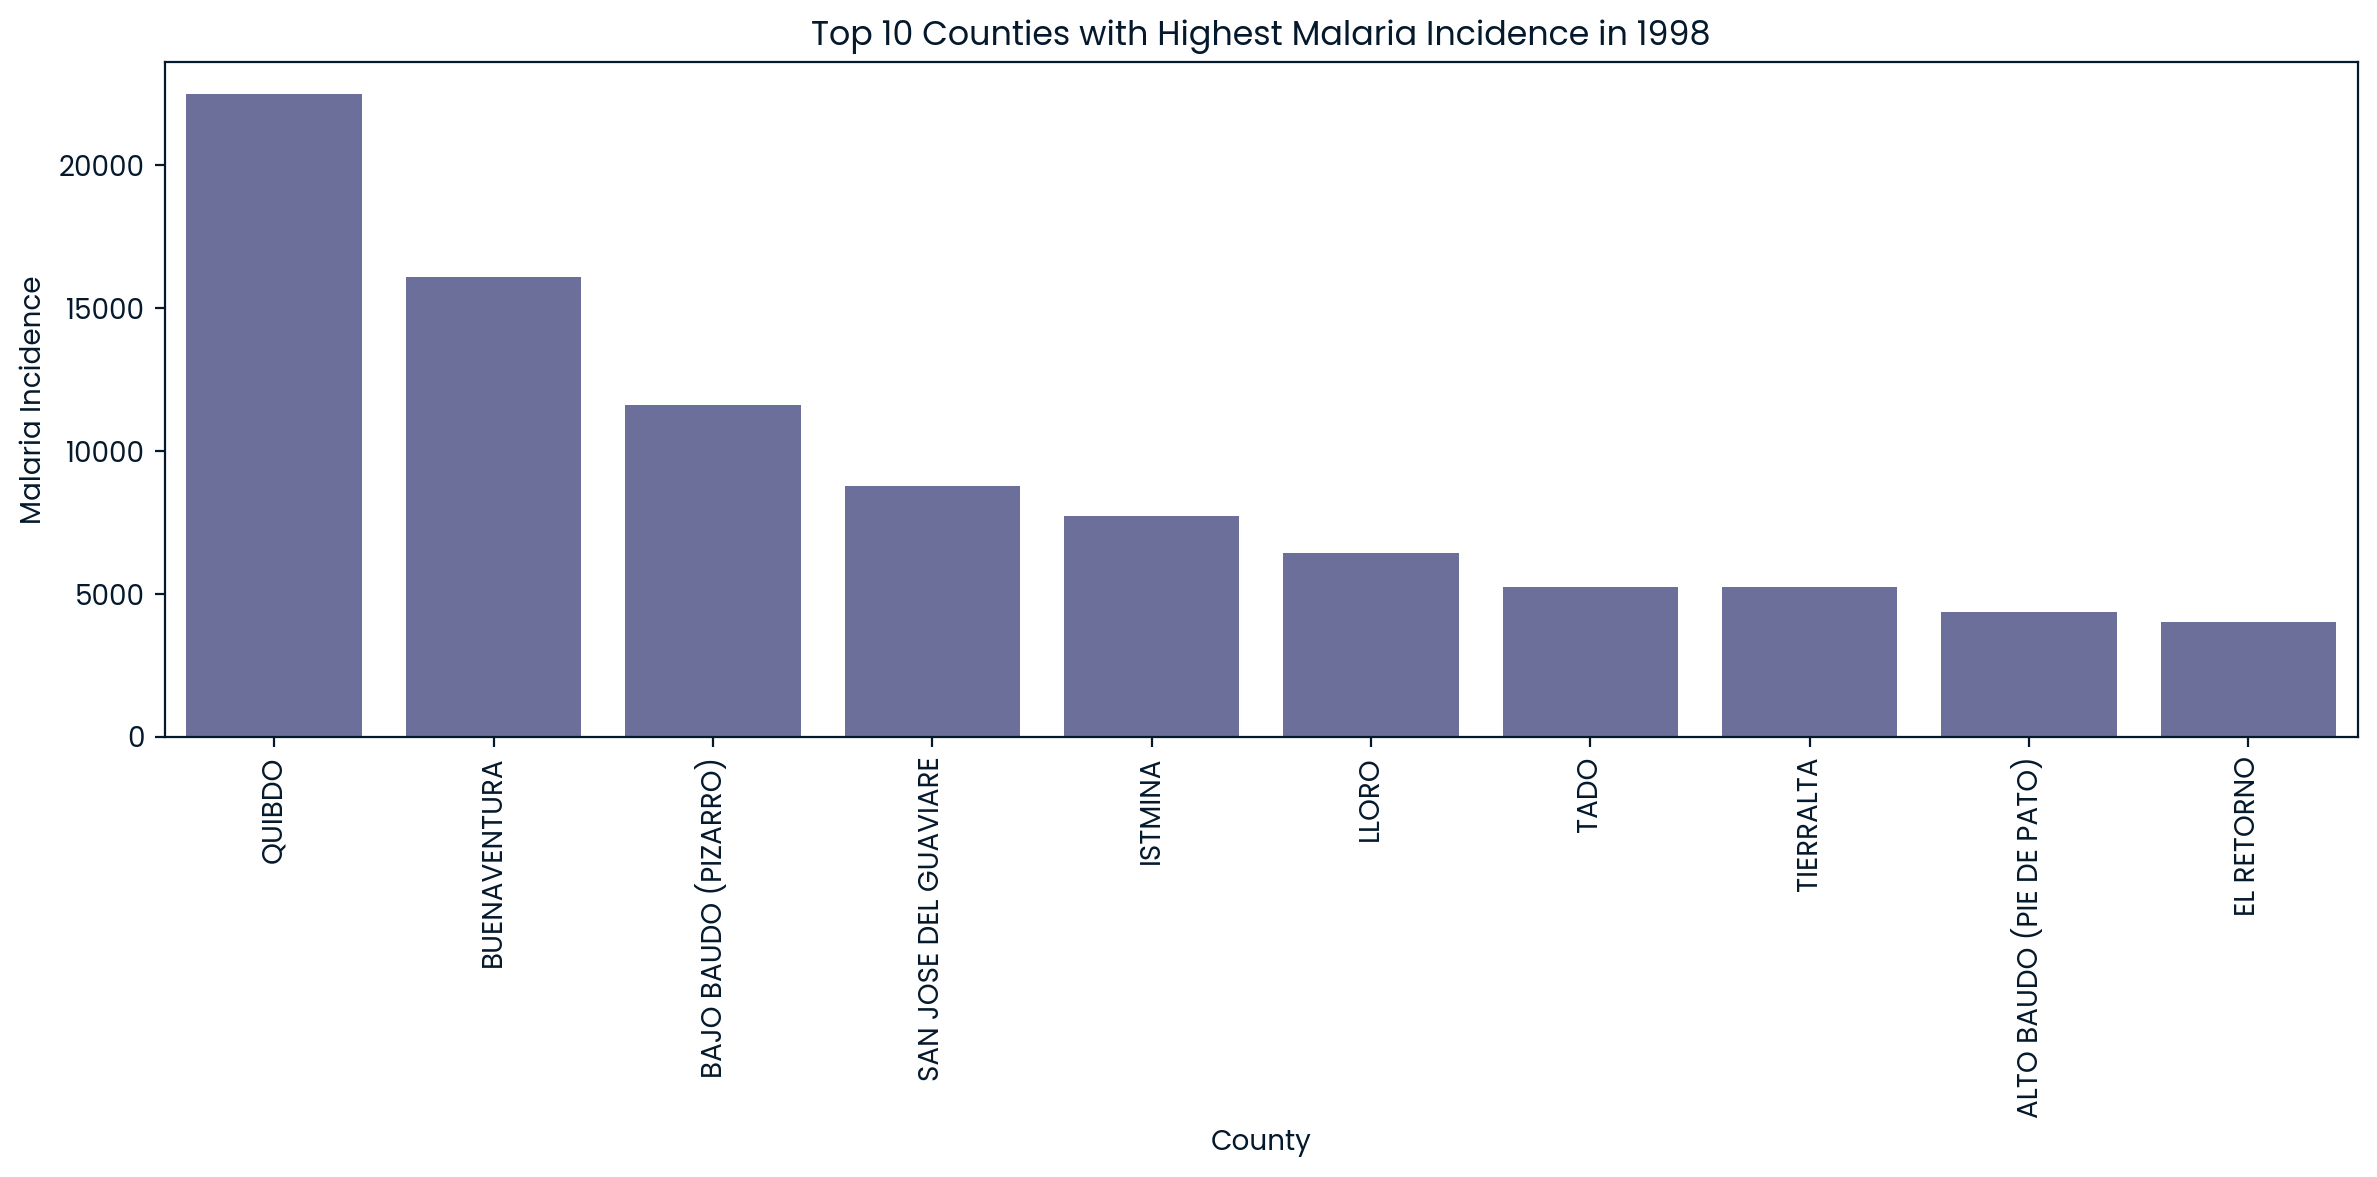

In [62]:
# Create a bar chart for malaria incidence
plt.figure(figsize=(12, 6))
sns.barplot(x='ADM2', y='MALARI98', data=df_selected.sort_values('MALARI98', ascending=False).head(10))
plt.title('Top 10 Counties with Highest Malaria Incidence in 1998')
plt.xlabel('County')
plt.ylabel('Malaria Incidence')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

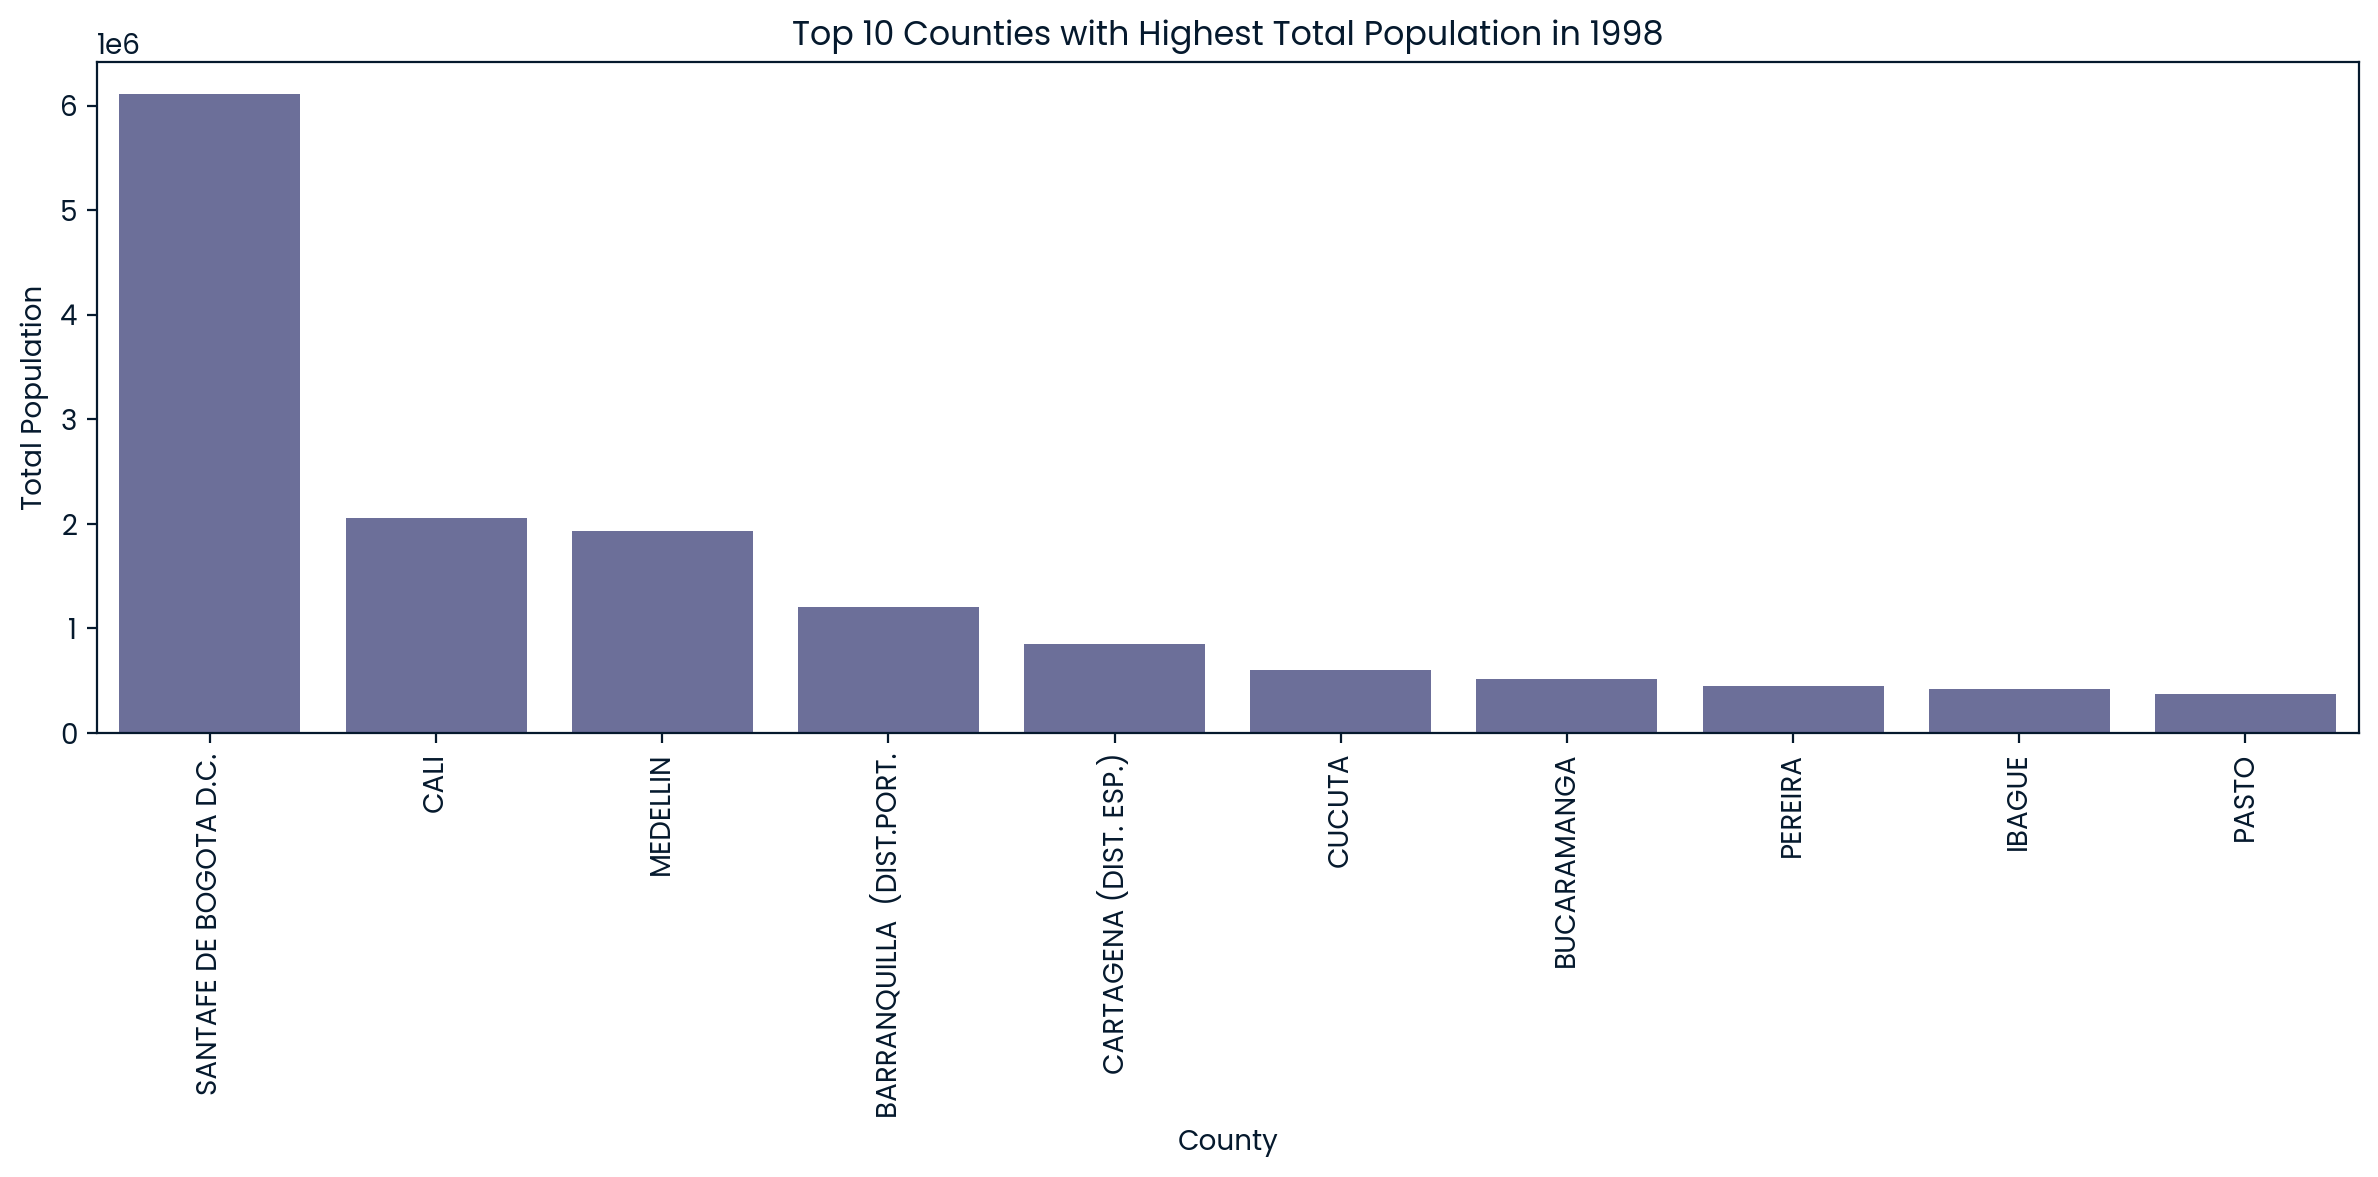

In [63]:
# Create a bar chart for total population
plt.figure(figsize=(12, 6))
sns.barplot(x='ADM2', y='TP1998', data=df_selected.sort_values('TP1998', ascending=False).head(10))
plt.title('Top 10 Counties with Highest Total Population in 1998')
plt.xlabel('County')
plt.ylabel('Total Population')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

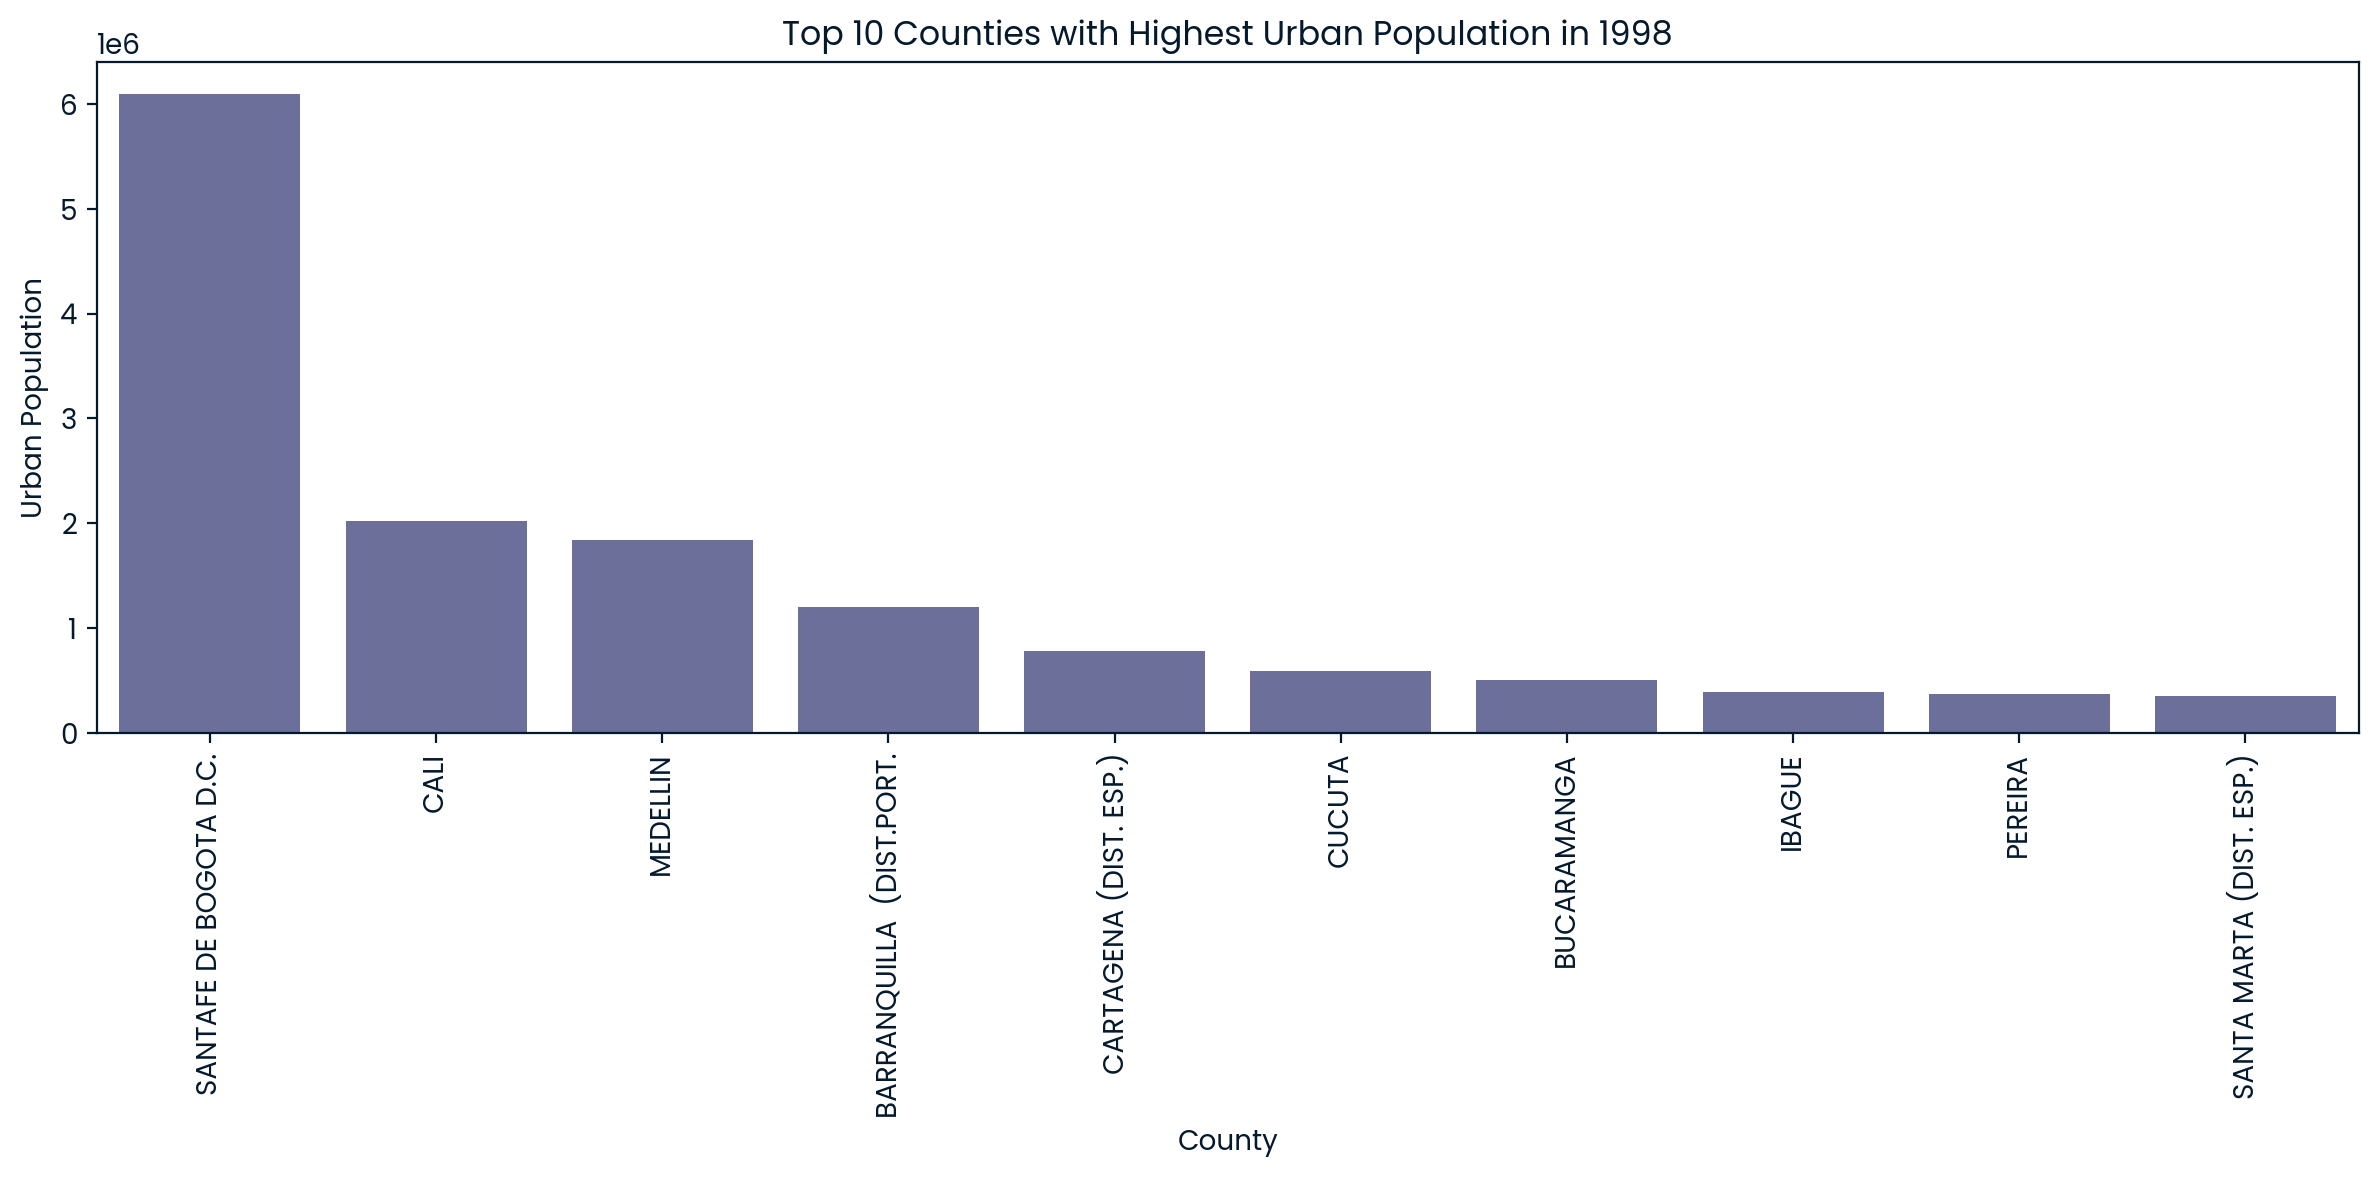

In [64]:
# Create a bar chart for urban population
plt.figure(figsize=(12, 6))
sns.barplot(x='ADM2', y='UP1998', data=df_selected.sort_values('UP1998', ascending=False).head(10))
plt.title('Top 10 Counties with Highest Urban Population in 1998')
plt.xlabel('County')
plt.ylabel('Urban Population')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

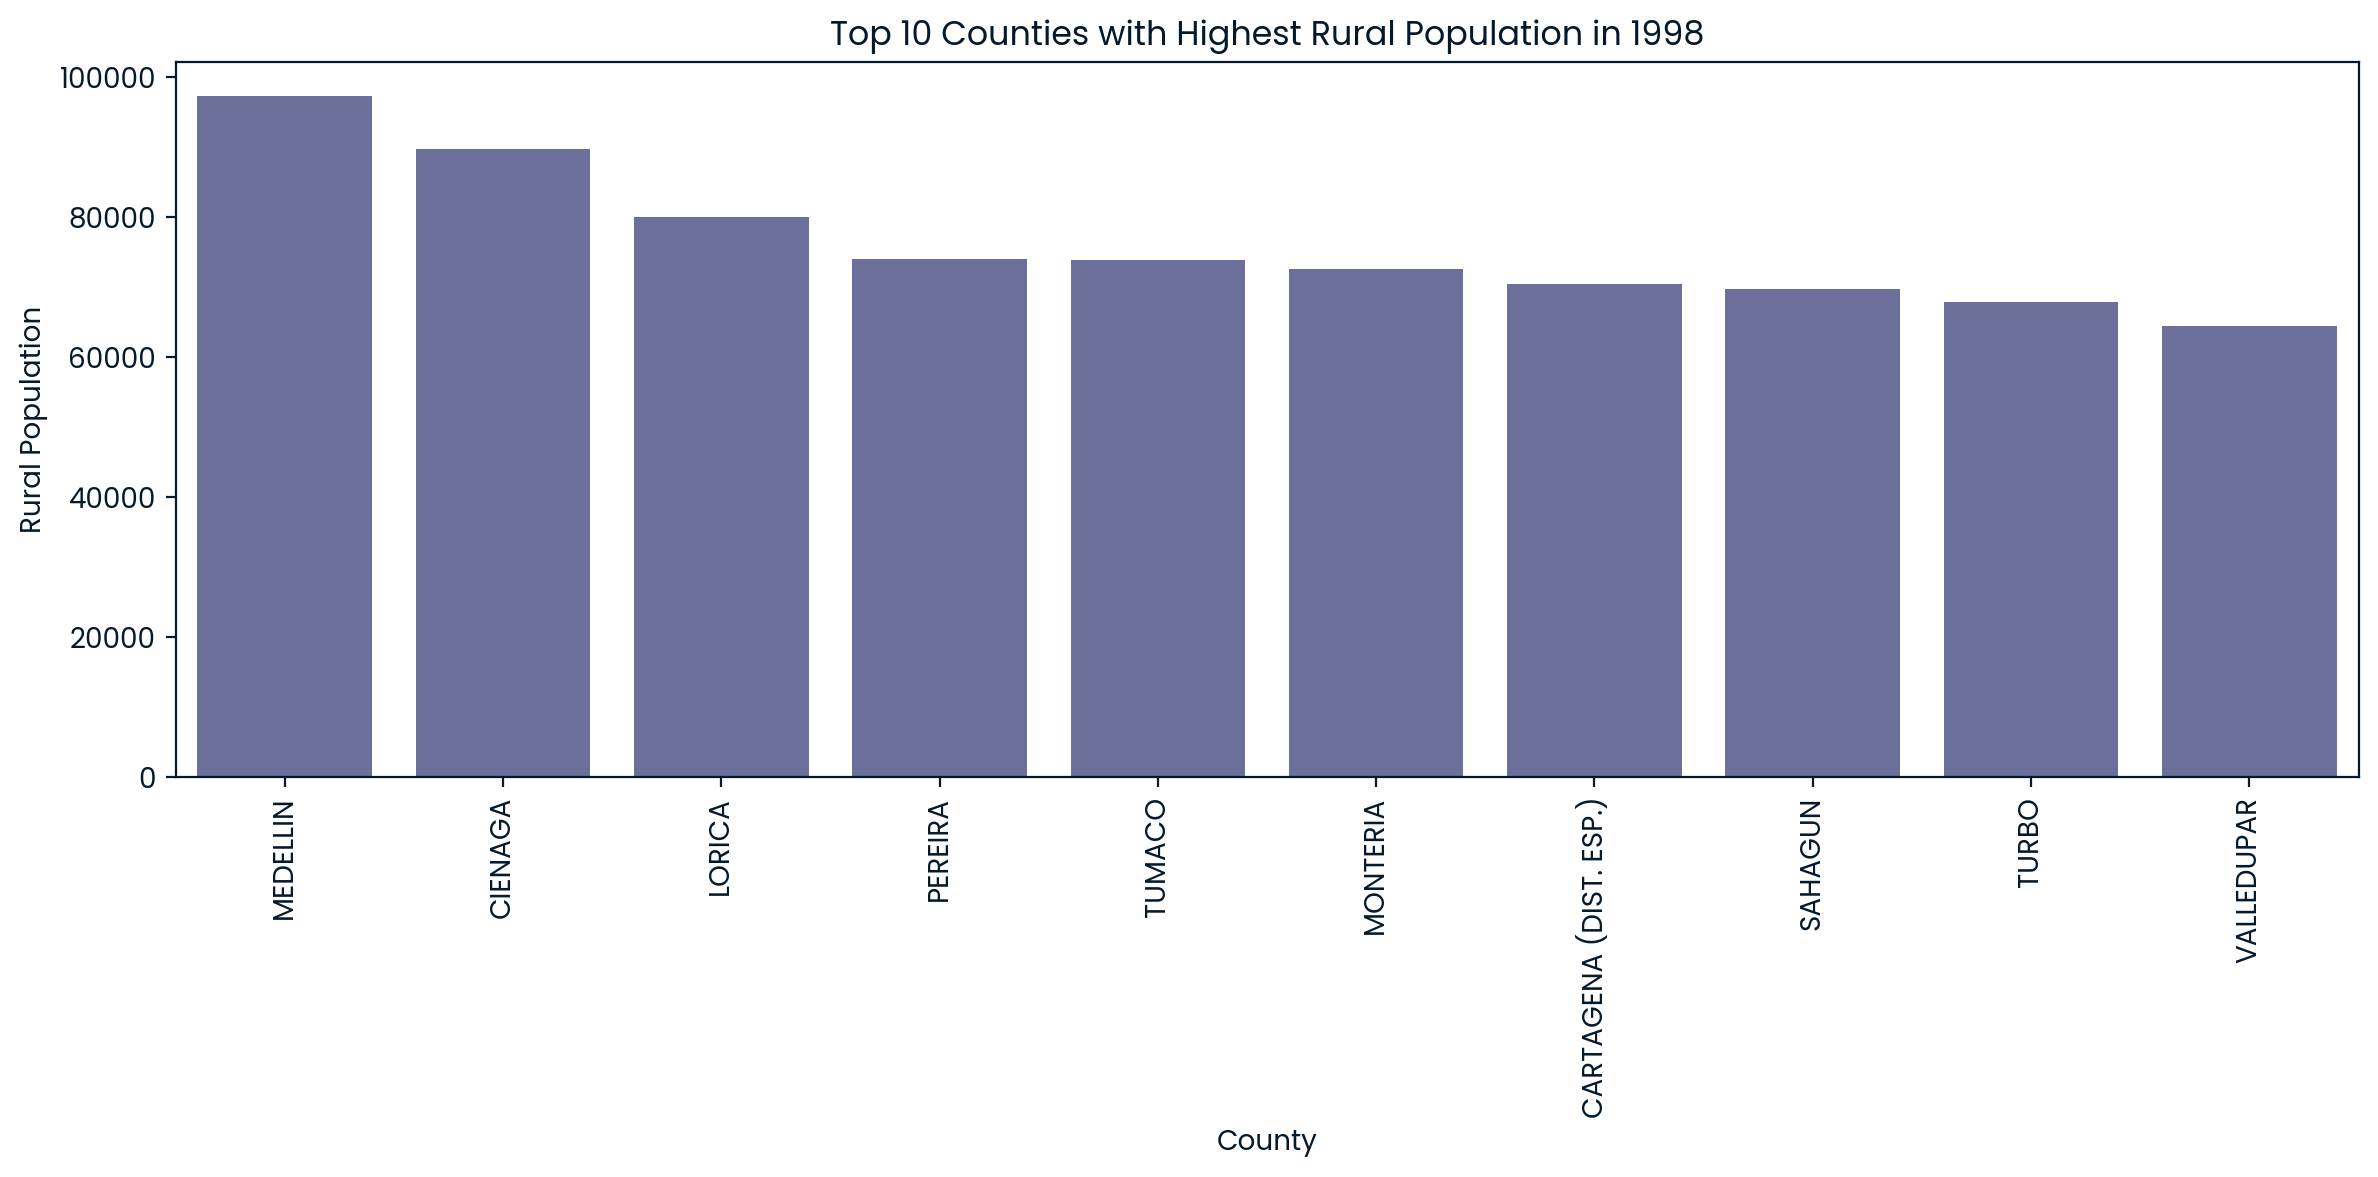

In [65]:
# Create a bar chart for rural population
plt.figure(figsize=(12, 6))
sns.barplot(x='ADM2', y='RP1998', data=df_selected.sort_values('RP1998', ascending=False).head(10))
plt.title('Top 10 Counties with Highest Rural Population in 1998')
plt.xlabel('County')
plt.ylabel('Rural Population')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [66]:
# Aggregate data by states (departments)
state_aggregated = merged_data.groupby('ADM1')['MALARI98'].sum().reset_index()

# Aggregate data by counties (municipalities)
county_aggregated = merged_data.groupby('ADM2')['MALARI98'].sum().reset_index()

# Sort states by malaria incidence
state_aggregated_sorted = state_aggregated.sort_values(by='MALARI98', ascending=False)

# Sort counties by malaria incidence
county_aggregated_sorted = county_aggregated.sort_values(by='MALARI98', ascending=False)

# Find the state with the highest and lowest malaria incidence
highest_incidence_state = state_aggregated_sorted.iloc[0]['ADM1']
lowest_incidence_state = state_aggregated_sorted.iloc[-1]['ADM1']

# Find the county with the highest and lowest malaria incidence
highest_incidence_county = county_aggregated_sorted.iloc[0]['ADM2']
lowest_incidence_county = county_aggregated_sorted.iloc[-1]['ADM2']

# Display results
print(str(highest_incidence_state) + " is the state with the highest malaria incident.")
print(str(lowest_incidence_state) + " is the state with the lowest malaria incident.")
print(str(highest_incidence_county) + " is the county with the highest malaria incident.")
print(str(lowest_incidence_county) + " is the county with the lowest malaria incident.")

Choco is the state with the highest malaria incident.
San Andres y Providencia is the state with the lowest malaria incident.
QUIBDO is the county with the highest malaria incident.
ZIPAQUIRA is the county with the lowest malaria incident.
